In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pylab as plt


In [2]:
#plt.style.use('seaborn-pastel')

In [13]:
file = open("../Lab data 2016/quartzsignal_his.dat")
x = [] 
i = 0
lines = file.readlines()

#print lines
for line in lines:
    line = line.replace('\r\n','')
    line = line.replace('\t','')
    try:
        data = int(line.replace('\n', ''))
        for j in range(data):
            x.append(i)
        print i, data
        i+=1
    except ValueError as e:
        print e
        print r"Line number %i: \"%s\" cannot be converted to float" %(i,line)
        
file.close()

0 0
1 0
2 0
3 0
4 0
5 0
6 194
7 154
8 163
9 114
10 120
11 109
12 115
13 110
14 133
15 135
16 171
17 212
18 258
19 632
20 1871
21 5333
22 11631
23 17972
24 21668
25 23225
26 23553
27 23904
28 23885
29 23658
30 23577
31 24218
32 24190
33 23948
34 23966
35 23972
36 24169
37 24210
38 23981
39 23920
40 23347
41 23893
42 23845
43 23717
44 23649
45 23779
46 23752
47 23638
48 23656
49 23680
50 23812
51 23538
52 23414
53 23767
54 23887
55 23904
56 23804
57 23886
58 23841
59 23758
60 23943
61 24298
62 23971
63 24133
64 24227
65 24508
66 24731
67 24629
68 24720
69 24551
70 24817
71 24946
72 25260
73 25383
74 25172
75 25580
76 25527
77 25703
78 25597
79 25698
80 26252
81 25701
82 26159
83 26395
84 26790
85 26842
86 26700
87 26897
88 27237
89 27379
90 27226
91 27800
92 27370
93 28226
94 28155
95 28217
96 28441
97 28558
98 28905
99 29193
100 29329
101 29790
102 29776
103 30085
104 30163
105 30334
106 30437
107 30689
108 30683
109 31265
110 31302
111 31607
112 32113
113 31935
114 32609
115 32556
116 

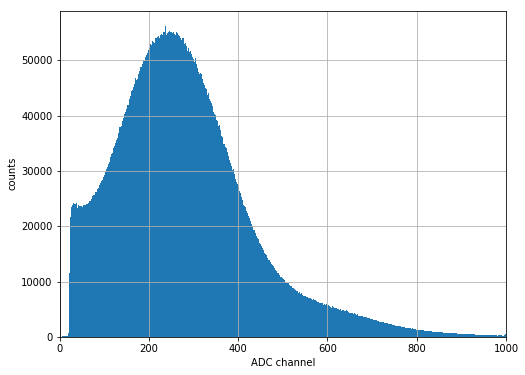

In [27]:
x = np.array(x)
fig, ax = plt.subplots(figsize=(8,6))
plt.grid()
ax.hist(x,bins = np.arange(0,1000,1))
ax.set_xlabel("ADC channel")
ax.set_ylabel("counts")
ax.set_xlim(0,1000)
plt.show()

In [30]:
print x.std()

153.597859709
